In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\30-70cancerChdEtc.csv")

In [3]:
cancer.head(10)

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9
5,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Female,27.8
6,Afghanistan,2010,Probability (%) of dying between age 30 and ex...,Both sexes,31.7
7,Afghanistan,2010,Probability (%) of dying between age 30 and ex...,Male,34.1
8,Afghanistan,2010,Probability (%) of dying between age 30 and ex...,Female,29.4
9,Afghanistan,2005,Probability (%) of dying between age 30 and ex...,Both sexes,34.1


In [4]:
allCountries = cancer['Location'].unique().tolist()

In [5]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = cancer[cancer['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Cancer Mortality Rate incidence")
    plt.title("Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease")
    plt.show()

In [10]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

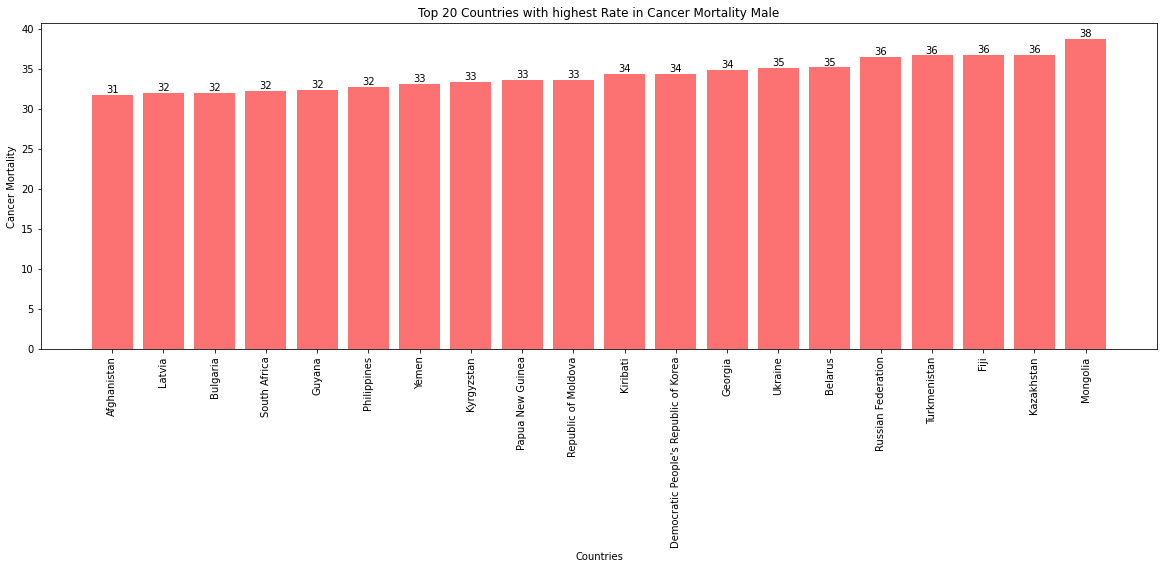

In [33]:
tempData = cancer[cancer['Period'] == 2016] 
tempData=tempData[tempData['Dim1']=='Male']
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Cancer Mortality")
plt.title("Top 20 Countries with highest Rate in Cancer Mortality Male")
plt.show()

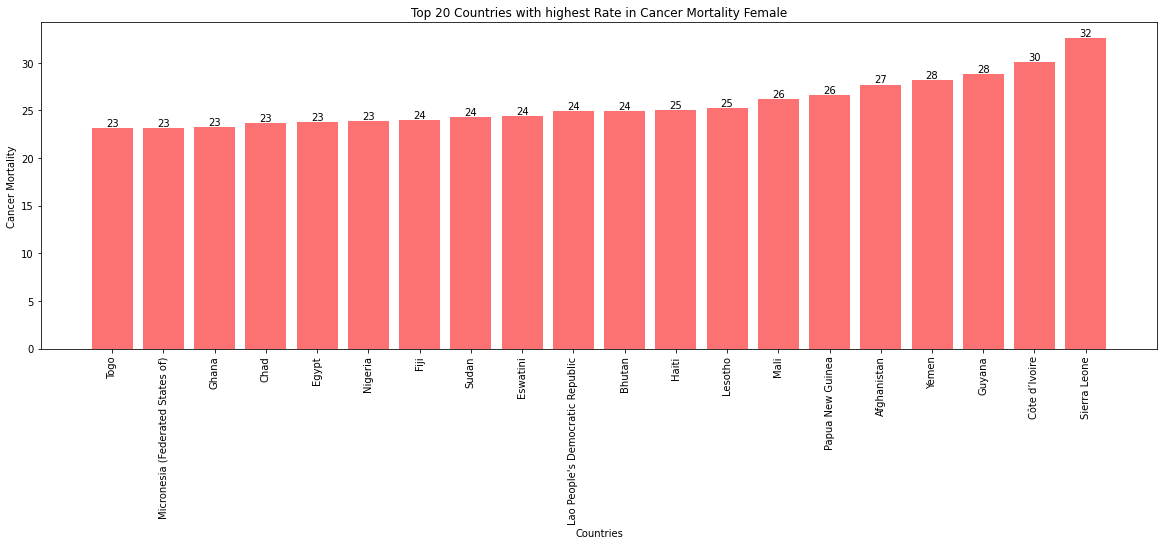

In [35]:
tempData = cancer[cancer['Period'] == 2016] 
tempData=tempData[tempData['Dim1']=='Female']
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Cancer Mortality")
plt.title("Top 20 Countries with highest Rate in Cancer Mortality Female")
plt.show()

In [38]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

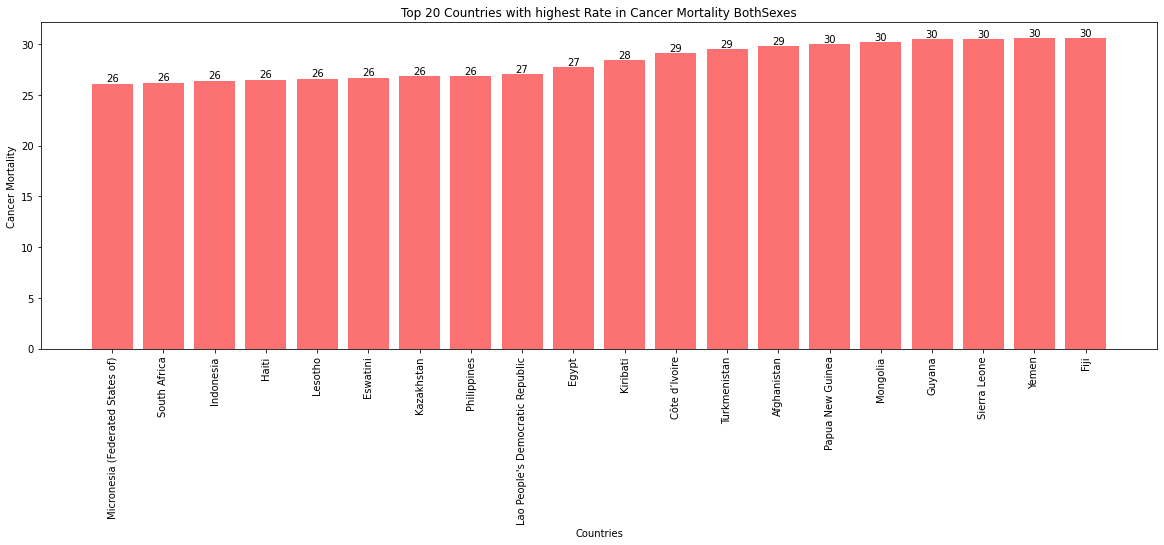

In [39]:
tempData = cancer[cancer['Period'] == 2016] 
tempData=tempData[tempData['Dim1']=='Both sexes']
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Cancer Mortality")
plt.title("Top 20 Countries with highest Rate in Cancer Mortality BothSexes")
plt.show()

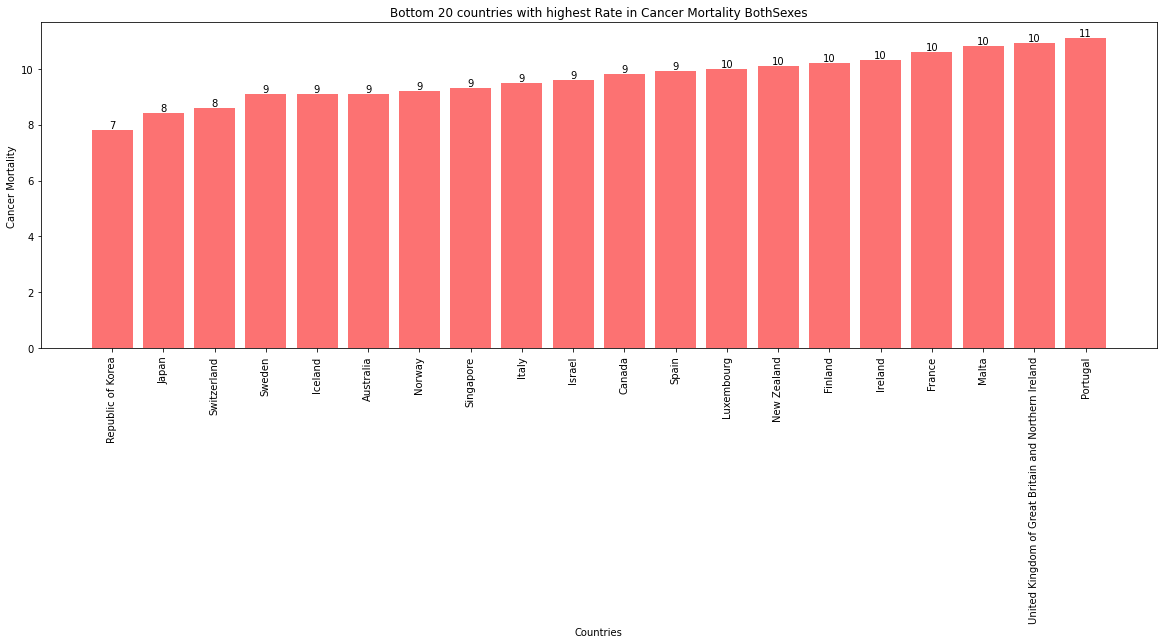

In [40]:
tempData = cancer[cancer['Period'] == 2016] 
tempData=tempData[tempData['Dim1']=='Both sexes']
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]



fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Cancer Mortality")
plt.title("Bottom 20 countries with highest Rate in Cancer Mortality BothSexes")
plt.show()

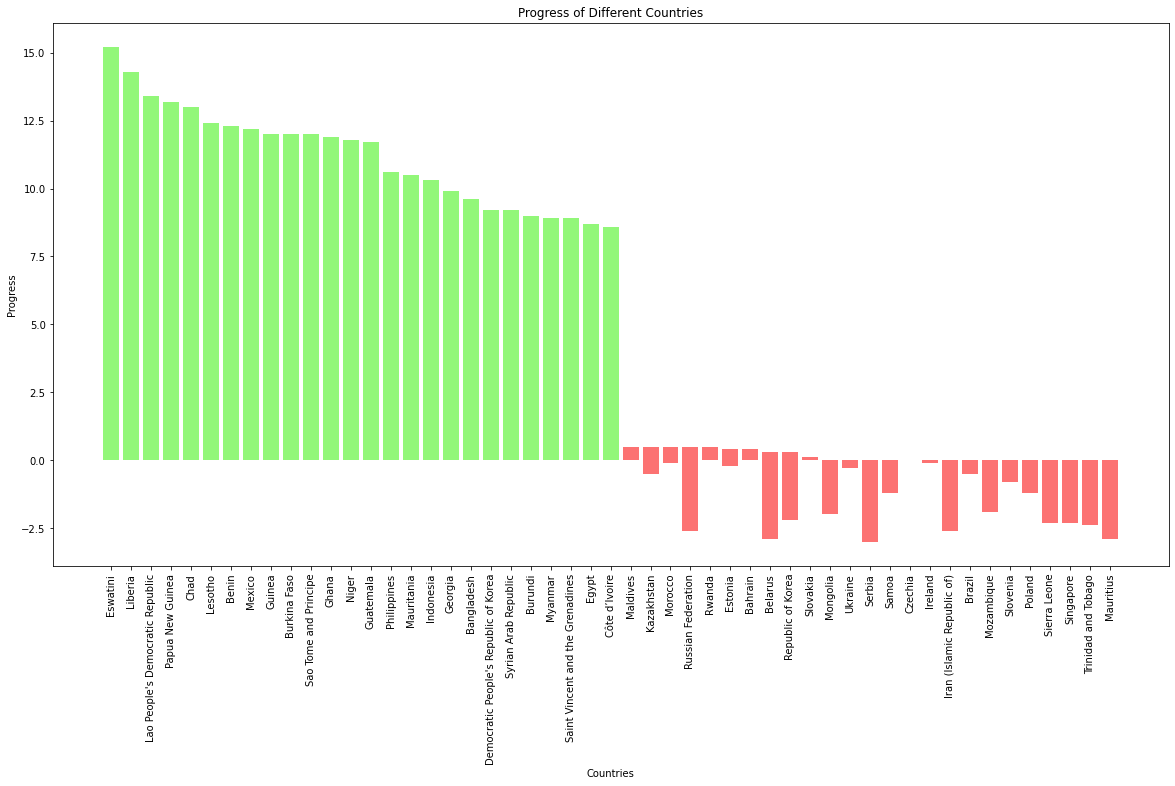

In [41]:

tempData2016 = cancer[cancer['Period'] == 2016]
tempData2000 = cancer[cancer['Period'] == 2000]
tempData2016.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2016.join(tempData2000, lsuffix='_16', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_16']
tempData = tempData[['Location_16', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[-50:]
tempDataBot = tempData[:50]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_16'], tempDataBot['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_16'], tempDataTop['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries")
plt.show()


In [42]:
def lines(data):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    probs = data[data['Dim1']=='Both sexes']['First Tooltip'].sort_values()
    least_keys, most_keys = probs[1:4], probs[-4:-1]
    least = data['Location'][least_keys.keys()]
    most = data['Location'][most_keys.keys()]
    freq = pd.DataFrame({'Least':least.reset_index(drop=True), 'Most':most.reset_index(drop=True)})

    for title in freq:
        for country in freq[title]:
            ax = axes[list(freq).index(title)][list(freq[title]).index(country)]
            df = data[data['Location']==country]

            both = df[df['Dim1']=='Both sexes']['First Tooltip']
            fema = df[df['Dim1']=='Male']['First Tooltip']
            male = df[df['Dim1']=='Female']['First Tooltip']
            years = np.unique(df['Period'])[::-1]

            ax.plot(years, both, label='Both sexes')
            ax.plot(years, fema, label='Females')
            ax.plot(years, male, label='Males')

            ax.set_title(title)
            ax.set_xlabel('Years in ' + country)
            ax.set_ylabel('Probability (%)')
            ax.legend()

    plt.suptitle(data['Indicator'].iloc[0])
    plt.show()

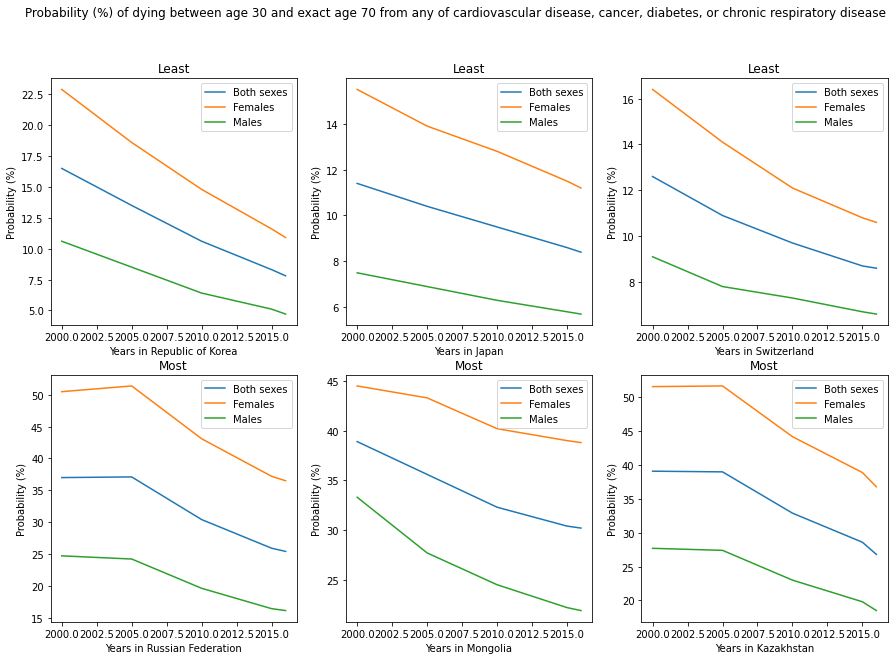

In [43]:
lines(cancer)